### Data contest notebook

In [50]:
# import required modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, matthews_corrcoef, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif,SelectPercentile
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

### Load Data set 1

In [51]:
df1 = pd.read_csv('Dataset_1_Training.csv')
colnames = df1['ID_REF']
df1 = df1.transpose().reset_index().rename(columns = colnames)
df1 = df1.drop(index = 0)
df1 = df1.rename(columns={'index': 'ID_REF'})
df1['CO: 1'], df1['CO: 2'] = df1['CO: 1'].astype(int), df1['CO: 2'].astype(int)

X, y1, y2 = df1.iloc[:, 1:-2], df1.iloc[:, -2], df1.iloc[:, -1]

# Train test split
#df1 = df1.T.drop(['ID_REF'],axis=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.15, random_state = 30)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.15, random_state = 30)
df1

ID_REF   gene_1  gene_2  gene_3   gene_4  gene_5  gene_6  gene_7  \
1     Train_01   12.444  8.3774  6.7866  10.2851  5.9064  8.3767  8.0356   
2     Train_02  12.2005  7.8592  8.0963  10.4624  4.9582  9.2973  7.0581   
3     Train_03  12.6709  8.6762  7.4812  10.1887  5.2332  9.1721  8.6061   
4     Train_04  11.6619  8.2557  7.9923  10.7705  6.3296  9.3777  8.4776   
5     Train_05  11.8397  8.7971  7.8321  10.2869  5.8389  7.0841  7.3419   
..         ...      ...     ...     ...      ...     ...     ...     ...   
126  Train_126  11.6268  8.0073  7.1604   9.3056  2.7648  9.0741  5.9092   
127  Train_127  11.4041  8.7849  8.1964   8.5677  3.2988  9.7455  6.6631   
128  Train_128  10.7539  8.6856  6.9133   9.7126  6.4256  9.6322  7.1716   
129  Train_129  11.3627  8.6771  4.9542   9.6943  4.0177  9.4154  8.1591   
130  Train_130  11.2276   7.586  6.6064   9.2455  6.5469  8.9235   7.487   

     gene_8  gene_9  ... gene_22276 gene_22277 gene_22278 gene_22279  \
1    6.6745  6.2325  ...    15.6236    15.2785     3.2915     3.6526   
2    6.4607  6.9047  ...    15.3234    15.1286     3.3811      2.588   
3    7.0932   6.594  ...    15.4604    15.2674     3.1665     3.9743   
4    6.5878  6.0877  ...    15.5185    15.1655     4.0045     3.8503   
5    7.3167  6.3456  ...    15.3143    14.9506     3.0514     3.2946   
..      ...     ...  ...        ...        ...        ...        ...   
126  5.2527  5.7626  ...    16.2751    15.9577     3.7471     4.9668   
127  3.9661  7.8396  ...    15.8719    15.6894     3.6019     2.1248   
128  3.9828  7.1508  ...    16.3562    15.9805     3.3113     3.2291   
129  6.9346  8.3595  ...    16.7598    16.4197     3.7133     4.3824   
130  2.7905  9.6112  ...    16.5992    16.3325     3.7023      3.017   

    gene_22280 gene_22281 gene_22282 gene_22283 CO: 1 CO: 2  
1       2.6412     1.2652      3.069     2.0271     0     1  
2       4.4798     4.8098     3.1637     2.4758     0     1  
3       5.2597     4.3815     2.8034     2.4669     0     0  
4       5.9114     0.7882     3.1831      3.482     0     0  
5       5.1537     3.9179     3.1881     2.9769     0     0  
..         ...        ...        ...        ...   ...   ...  
126     2.9813      5.331      5.344     2.5358     0     0  
127     2.1941     2.5694     3.0073     1.4667     0     0  
128     5.3262     5.4001     3.4438     3.2322     0     1  
129     4.8936     2.9212     6.7353     4.3268     0     0  
130     5.7184     4.7485     5.2038     2.4601     0     0  

[130 rows x 22286 columns]

### Load Data set 2

In [52]:
df2 = pd.read_csv('Dataset_2_Training.csv')
colnames = df2['ID_REF']
df2 = df2.transpose().reset_index().rename(columns = colnames)
df2 = df2.drop(index = 0)
df2 = df2.rename(columns={'index': 'ID_REF'})
df2['CO: 3'], df2['CO: 4'] = df2['CO: 3'].astype(int), df2['CO: 4'].astype(int)
df2['CO: 5'], df2['CO: 6'] = df2['CO: 5'].astype(int), df2['CO: 6'].astype(int)

X2, y3, y4, y5, y6 = df2.iloc[:, 1:-4], df2.iloc[:, -4], df2.iloc[:, -3], df2.iloc[:, -2], df2.iloc[:, -1]

# Train test split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y3, test_size = 0.15, random_state = 30)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y4, test_size = 0.15, random_state = 30)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X2, y5, test_size = 0.15, random_state = 30)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X2, y6, test_size = 0.15, random_state = 30)

In [190]:
# Function for visualising feature importances

def featureimpplot(conum, indices, importances, features, numfeatures, c):
    plt.figure(figsize=(20,30))
    plt.title('Feature Importances for CO:' + str(conum))
    plt.barh(range(len(indices[-numfeatures:])), importances[indices[-numfeatures:]], color = c, align='center')
    plt.yticks(range(len(indices[-numfeatures:])), [features[i] for i in indices[-numfeatures:]])
    plt.xlabel('Relative Importance')
    plt.show()

### Data set 1 Visualisation

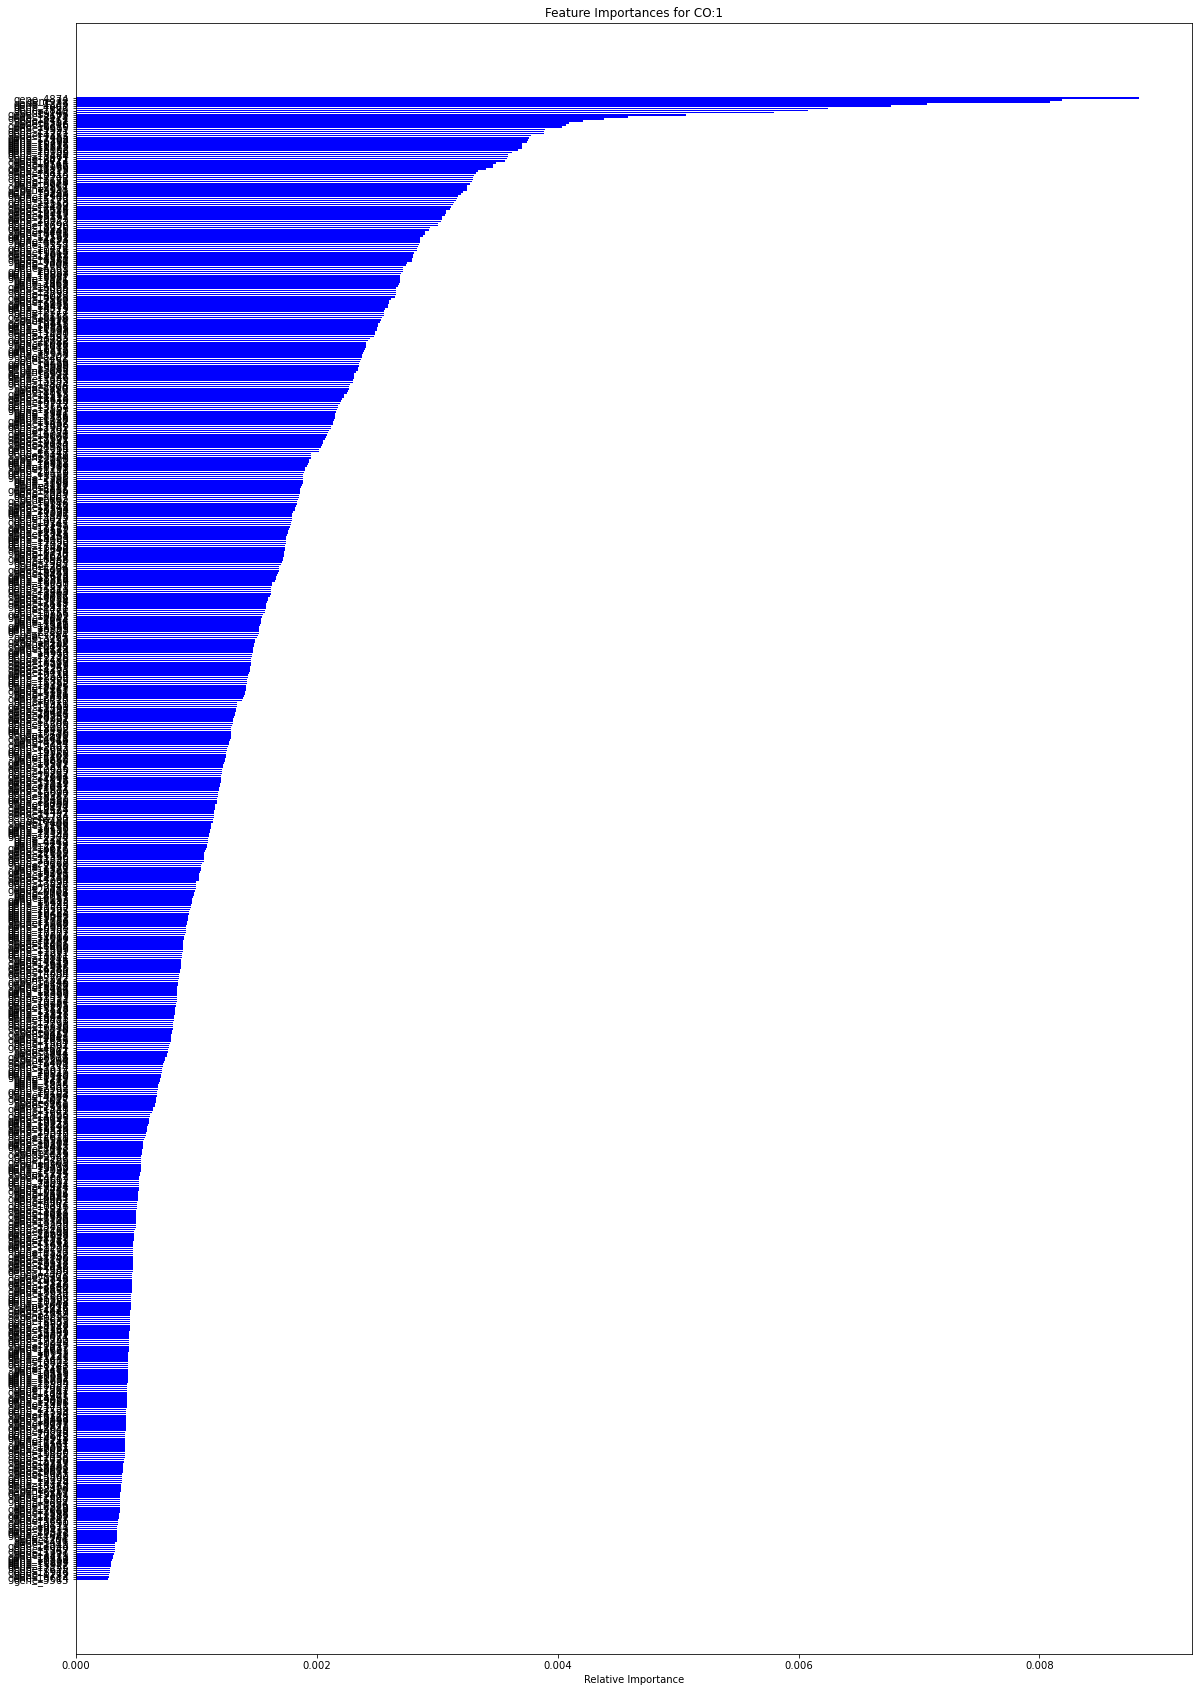

In [178]:
model_RF1 = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42)
model_RF1.fit(X_train1, y_train1)

# plotting feature importances
features1 = X.columns
importances1 = model_RF1.feature_importances_
indices1 = np.argsort(importances1)

featureimpplot(1, indices1, importances1, features1, 709, 'b')

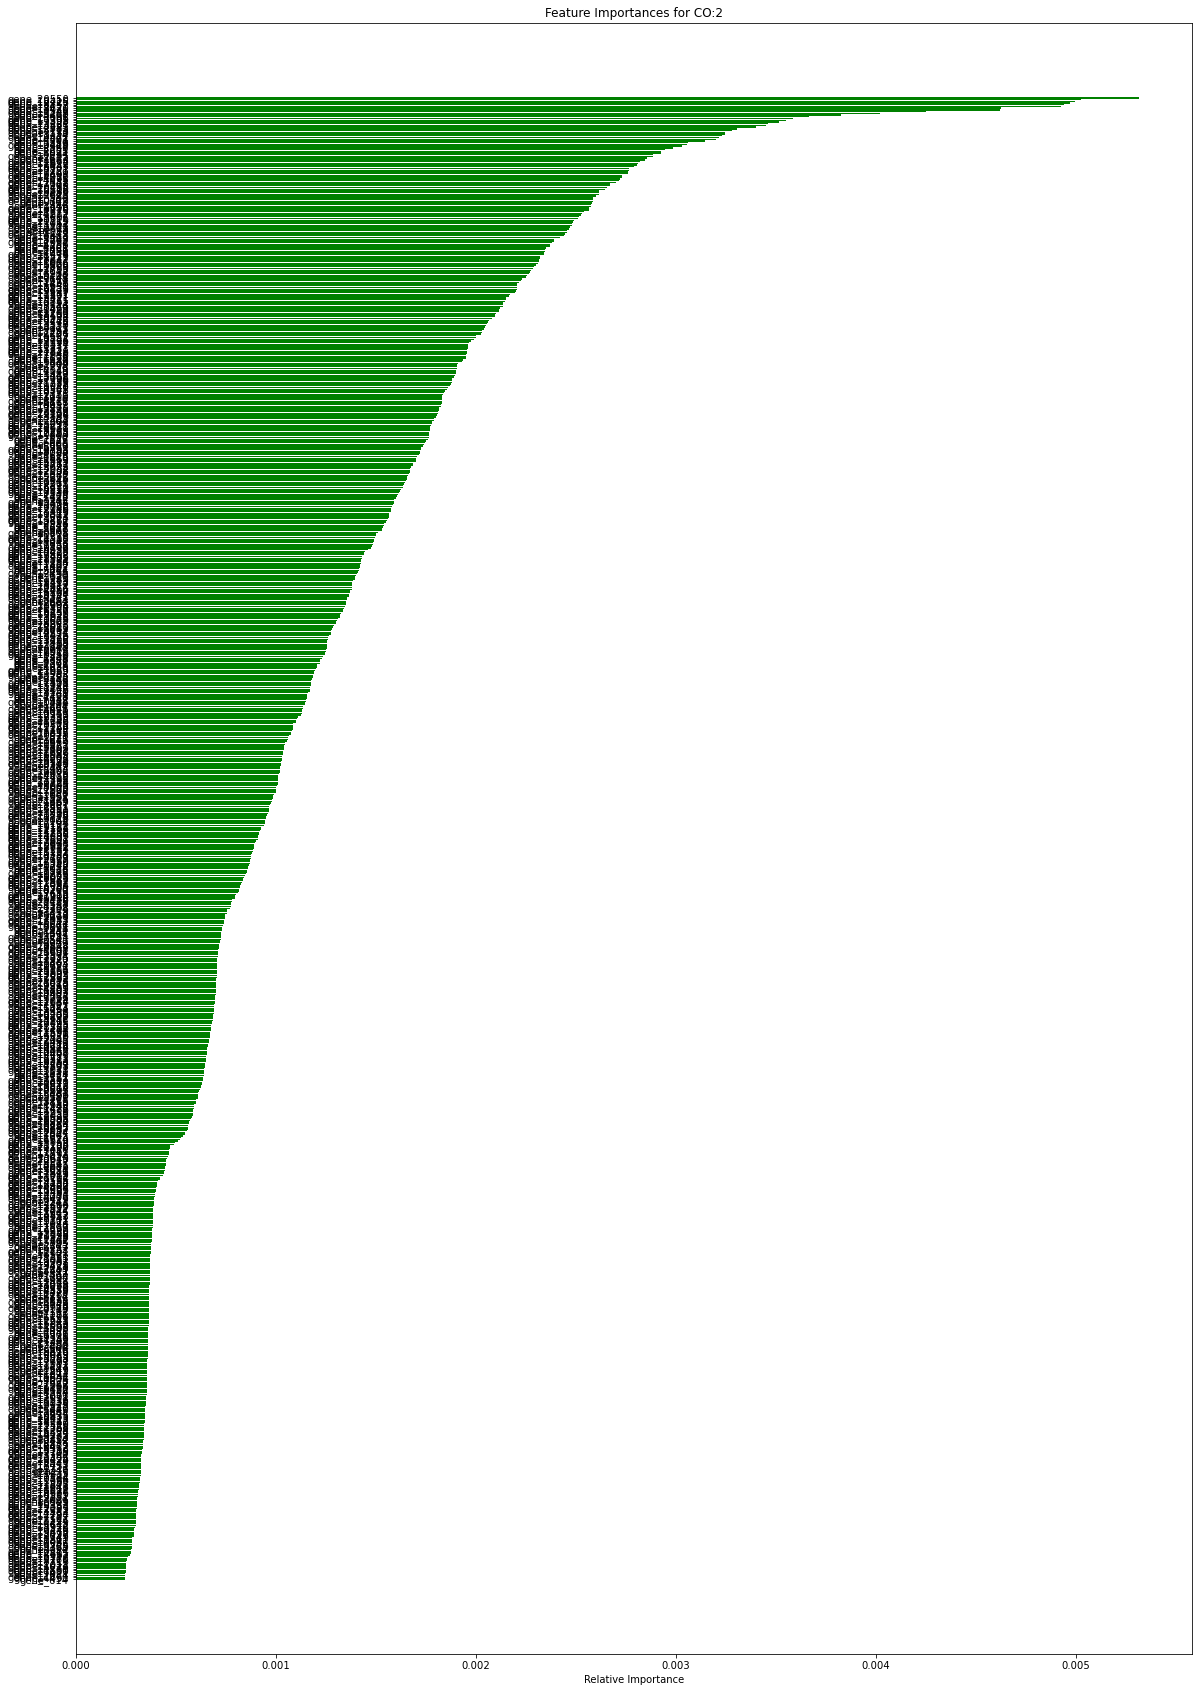

In [179]:
model_RF2 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
model_RF2.fit(X_train2, y_train2)

# plotting feature importances
features2 = X.columns
importances2 = model_RF2.feature_importances_
indices2 = np.argsort(importances2)

featureimpplot(2, indices2, importances2, features2, 860, 'g')

### Data set 2 Visualisation

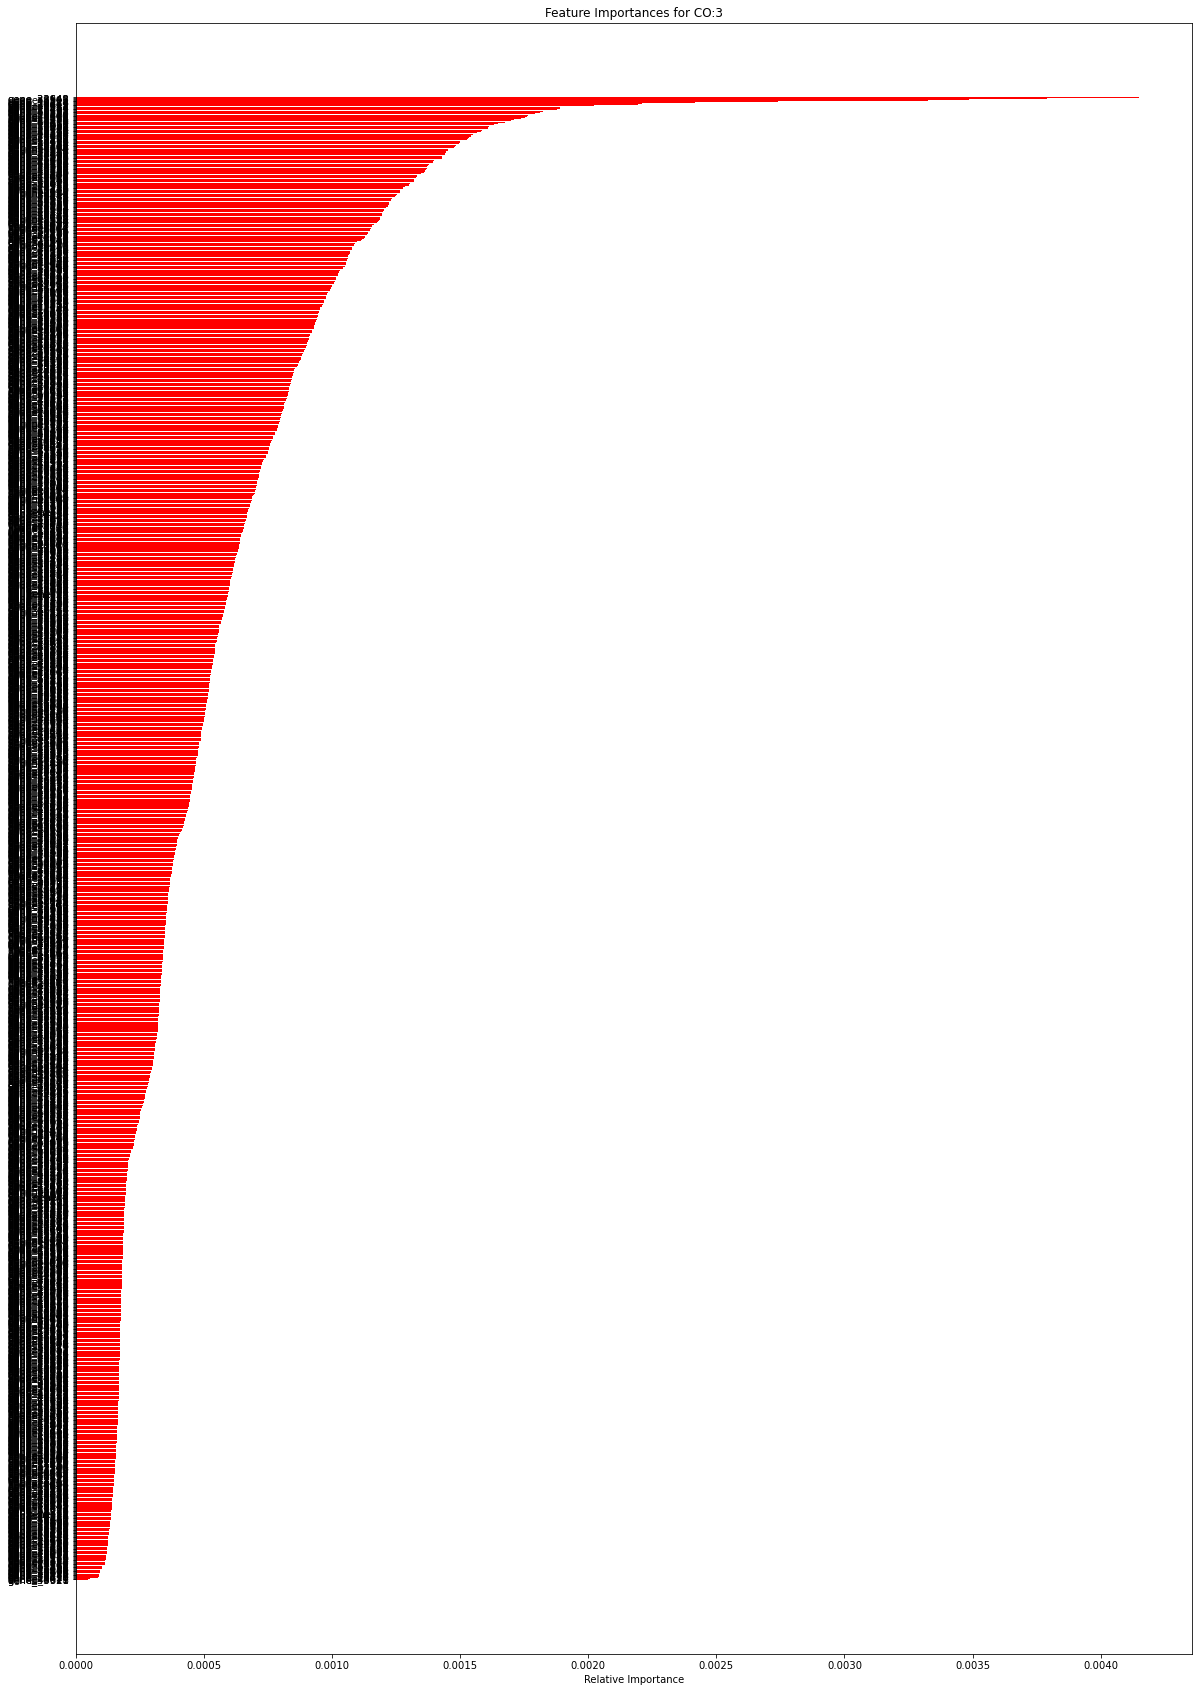

In [180]:
model_RF3 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
model_RF3.fit(X_train3, y_train3)

# plotting feature importances
features3 = X2.columns
importances3 = model_RF3.feature_importances_
indices3 = np.argsort(importances3)

featureimpplot(3, indices3, importances3, features3, 1875, 'r')

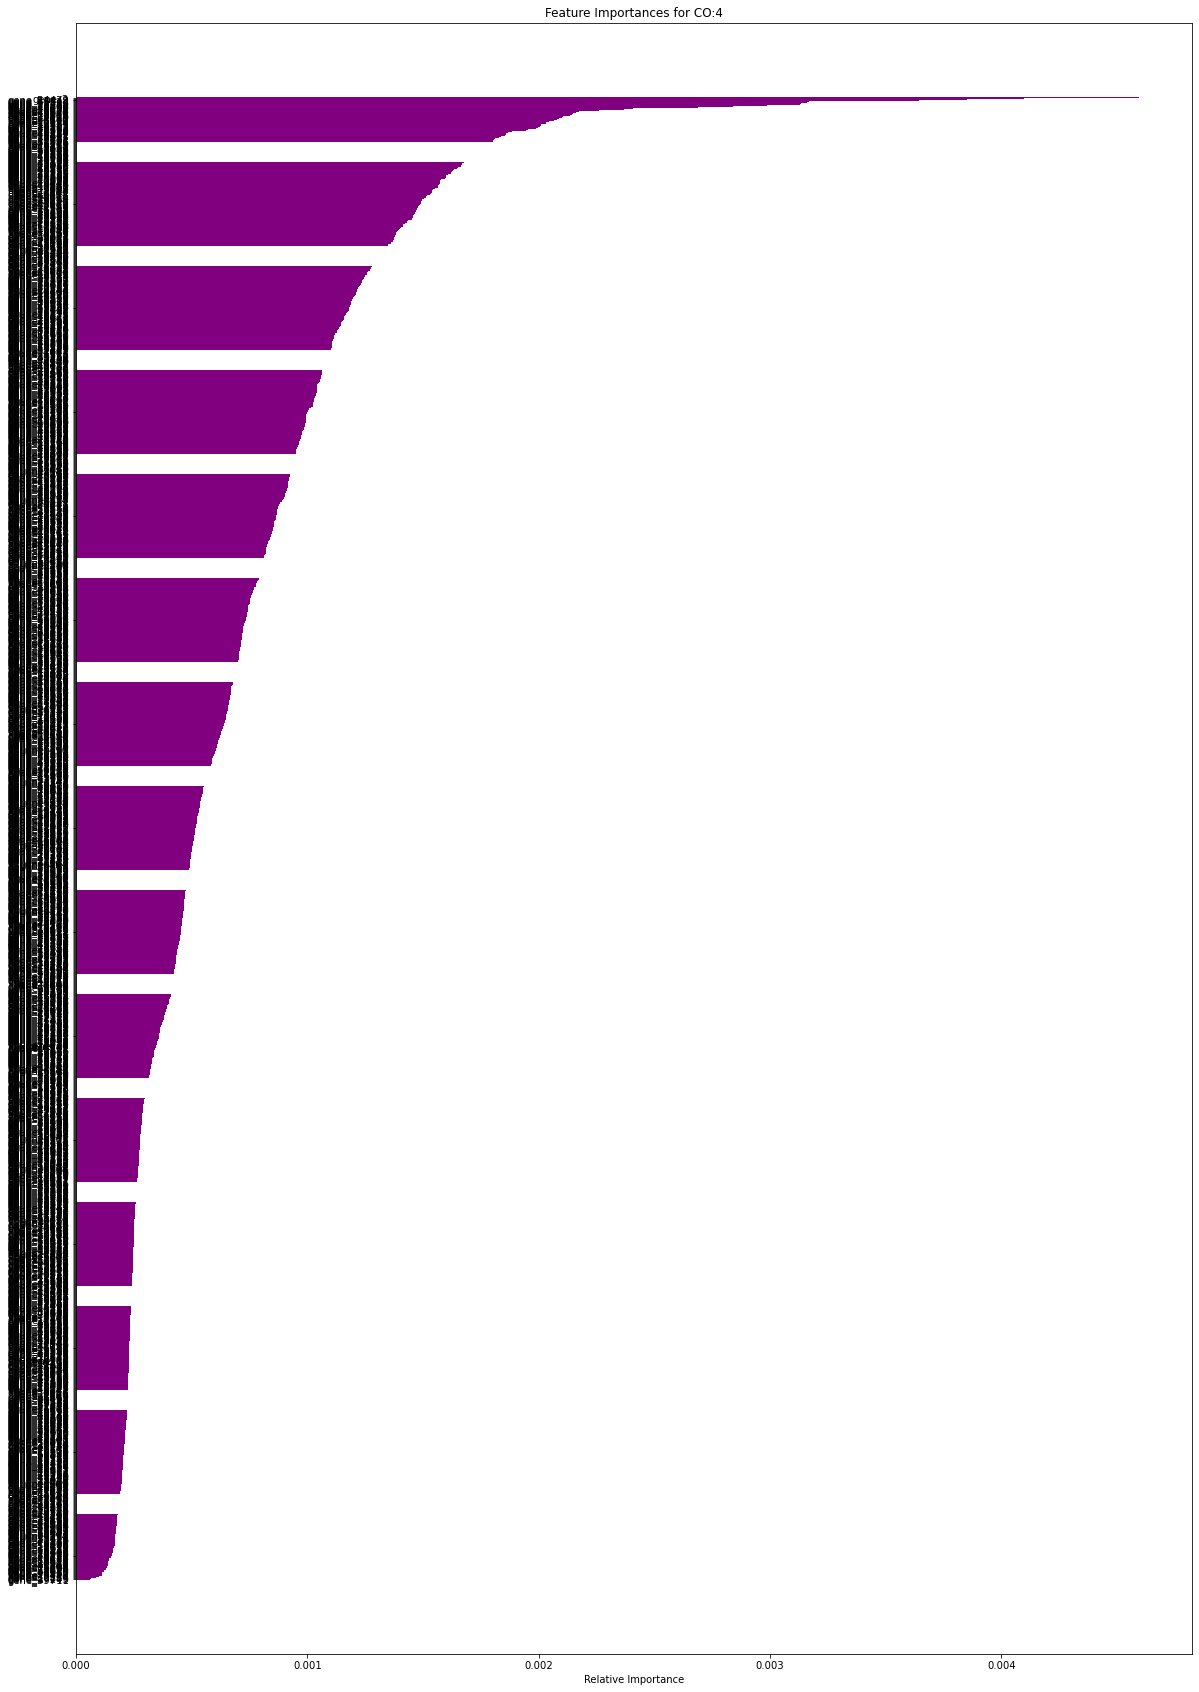

In [191]:
model_RF4 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
model_RF4.fit(X_train4, y_train4)

# plotting feature importances
features4 = X2.columns
importances4 = model_RF4.feature_importances_
indices4 = np.argsort(importances4)

featureimpplot(4, indices4, importances4, features4, 1497, 'purple')

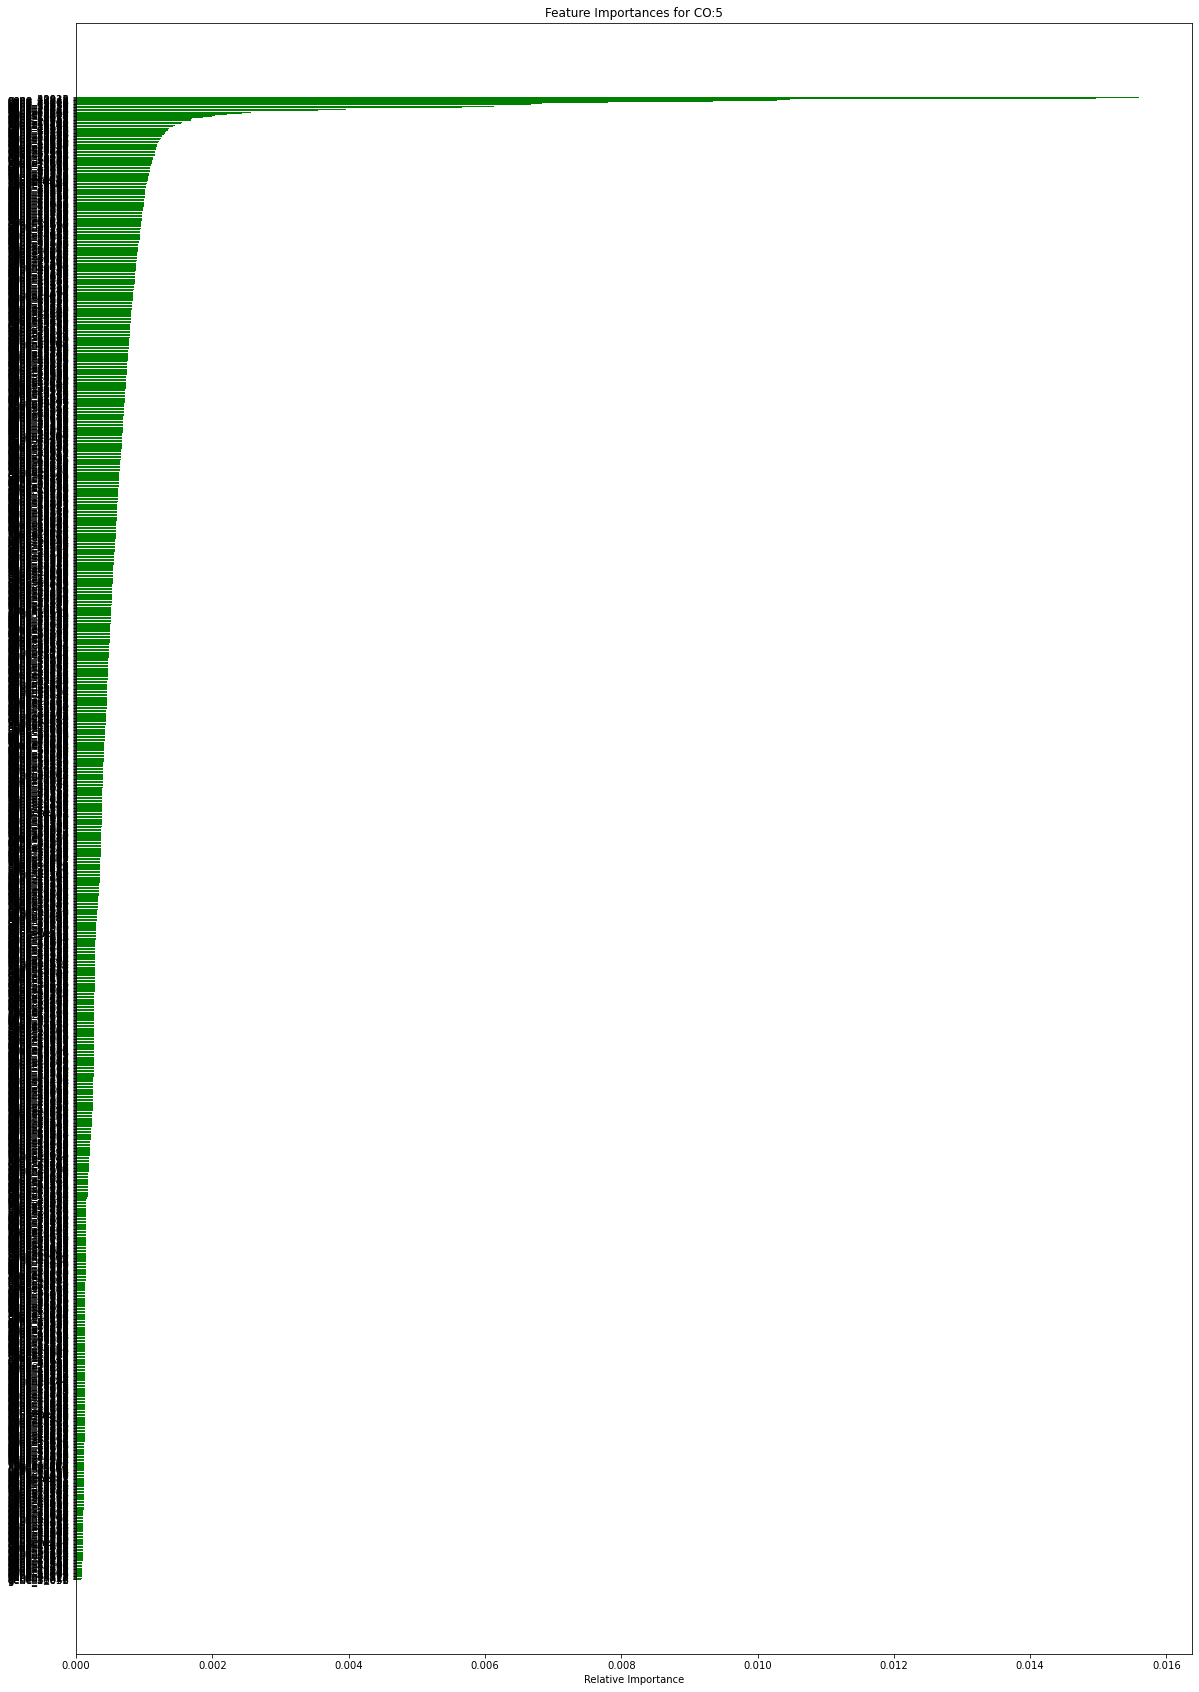

In [182]:
model_RF5 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
model_RF5.fit(X_train5, y_train5)

# plotting feature importances
features5 = X2.columns
importances5 = model_RF5.feature_importances_
indices5 = np.argsort(importances5)

featureimpplot(5, indices5, importances5, features5, 1944, 'g')

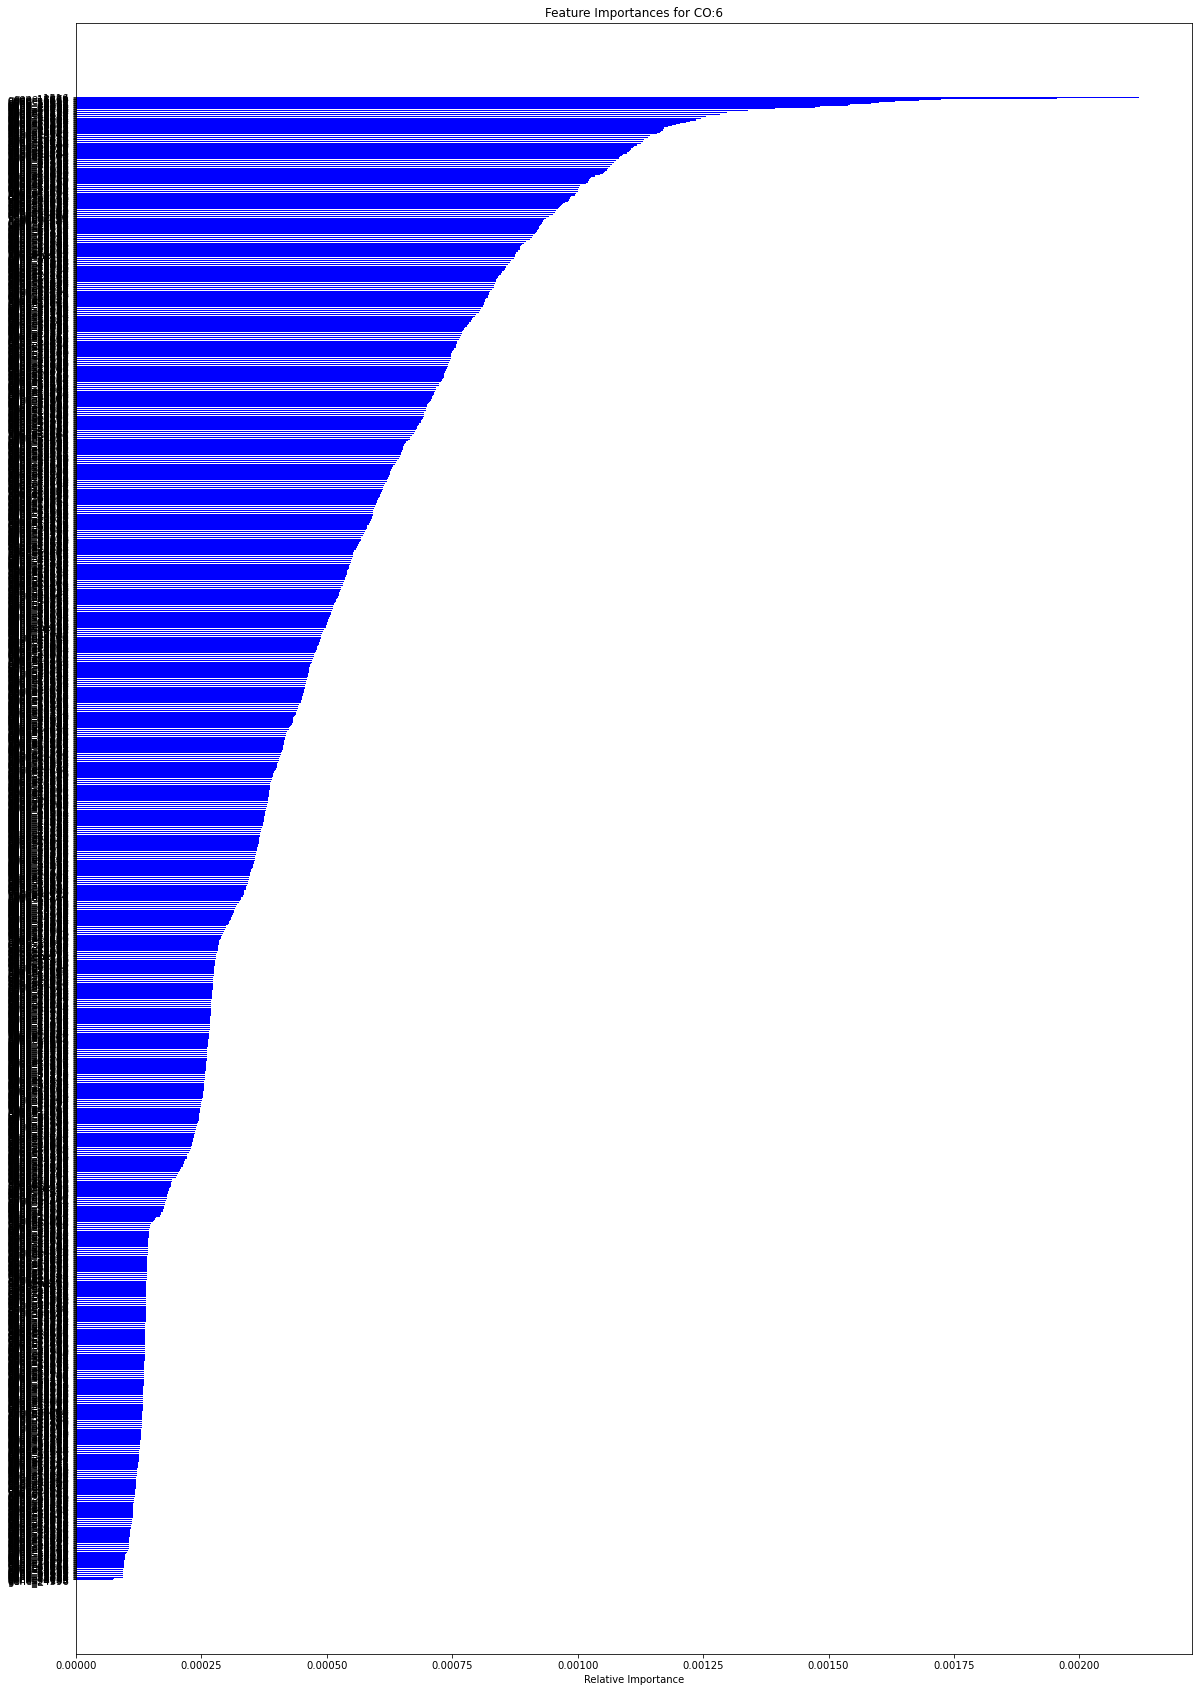

In [183]:
model_RF6 = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
model_RF6.fit(X_train6, y_train6)

# plotting feature importances
features6 = X2.columns
importances6 = model_RF6.feature_importances_
indices6 = np.argsort(importances6)

featureimpplot(6, indices6, importances6, features6, 2254, 'b')

In [114]:
# CO: 1 709 genes. Most important gene is gene_4874

In [95]:
list1 = list(reversed([features1[i] for i in indices1[-709:]]))
#with open('CO 1 genes.csv', 'w') as f:
#    f.write("\n".join(list1))

In [117]:
# CO: 2 860 genes. Most important gene is gene_20550

In [120]:
list2 = list(reversed([features2[i] for i in indices2[-860:]]))
#with open('CO 2 genes.csv', 'w') as f:
#    f.write("\n".join(list2))

In [131]:
# CO: 3 1875 genes. Most important gene is gene_33948

In [134]:
list3 = list(reversed([features3[i] for i in indices3[-1875:]]))
temp = importances3[indices3[-1875:]]
#print(list3)
#with open('CO 3 genes.csv', 'w') as f:
#    f.write("\n".join(list3))

In [143]:
# CO: 4 1497 genes. Most important gene is gene_2

In [146]:
list4 = list(reversed([features4[i] for i in indices4[-1497:]]))
temp = importances4[indices4[-1497:]]
#print(list4)
#with open('CO 4 genes.csv', 'w') as f:
#    f.write("\n".join(list4))

In [159]:
# CO: 5 1944 genes. Most important gene is gene_40015

In [162]:
list5 = list(reversed([features5[i] for i in indices5[-1944:]]))
temp = list(reversed(importances5[indices5[-1944:]]))
#print(list5)
#with open('CO 5 genes.csv', 'w') as f:
#    f.write("\n".join(list5))

In [163]:
# CO: 6 2254 genes. Most important gene is gene_1516

In [177]:
list6 = list(reversed([features6[i] for i in indices6[-2254:]]))
temp = list(reversed(importances6[indices6[-2254:]]))
#print(list6)

#with open('CO 6 genes.csv', 'w') as f:
#    f.write("\n".join(list6))

### Count of target variable unique values

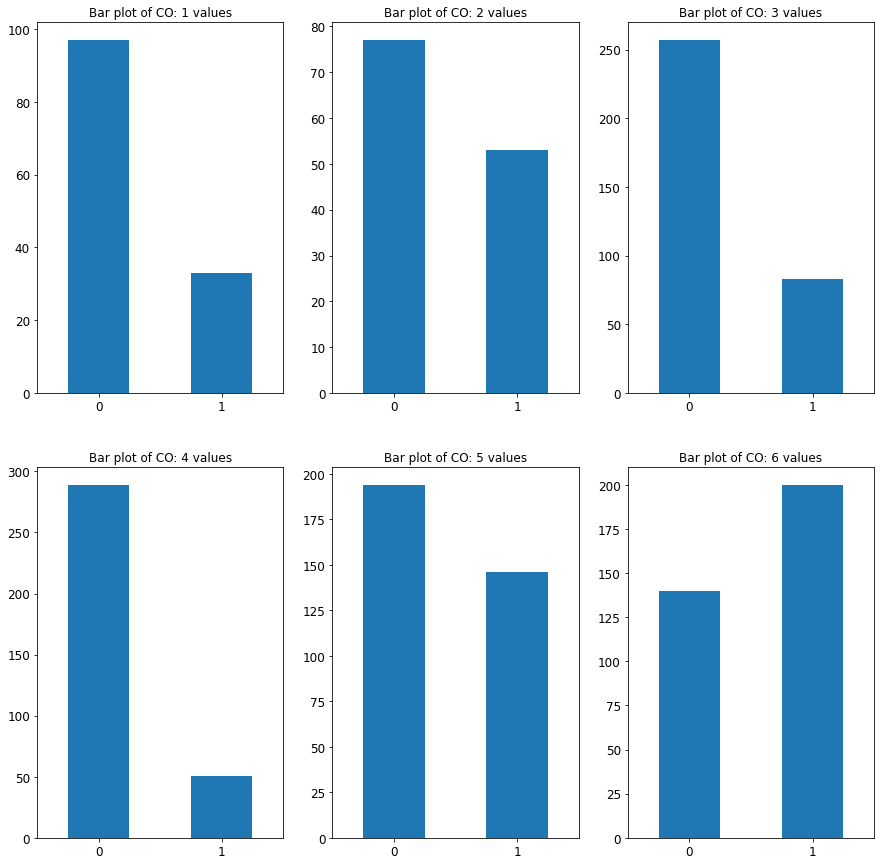

In [207]:
y = [y1, y2, y3, y4, y5, y6]
plt.figure(figsize = (15, 15))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.yticks()
    plt.title('Bar plot of CO: ' + str(i) + ' values')
    y[i - 1].value_counts().loc[[0, 1]].plot(kind = 'bar', rot = 0, fontsize = 12)

In [284]:
def parallel_plt(numgene, conum, listnum):
    collist = listnum[:numgene]
    plt.figure(figsize = (20,15))
    sns.set_style('dark')
    sns.color_palette('pastel')
    if conum < 3:
        pd.plotting.parallel_coordinates(df1 , str('CO: ' + str(conum)), cols = collist, color = ('yellowgreen', 'lightcoral'))
    else:
        pd.plotting.parallel_coordinates(df2 , str('CO: ' + str(conum)), cols = collist, color = ('yellowgreen', 'lightcoral'))
    plt.xticks(rotation = 90)
    plt.legend(fontsize = 25)
    plt.title('Parallel coordinates plot of the top ' + str(numgene) + ' genes for CO: ' + str(conum))
    plt.show()

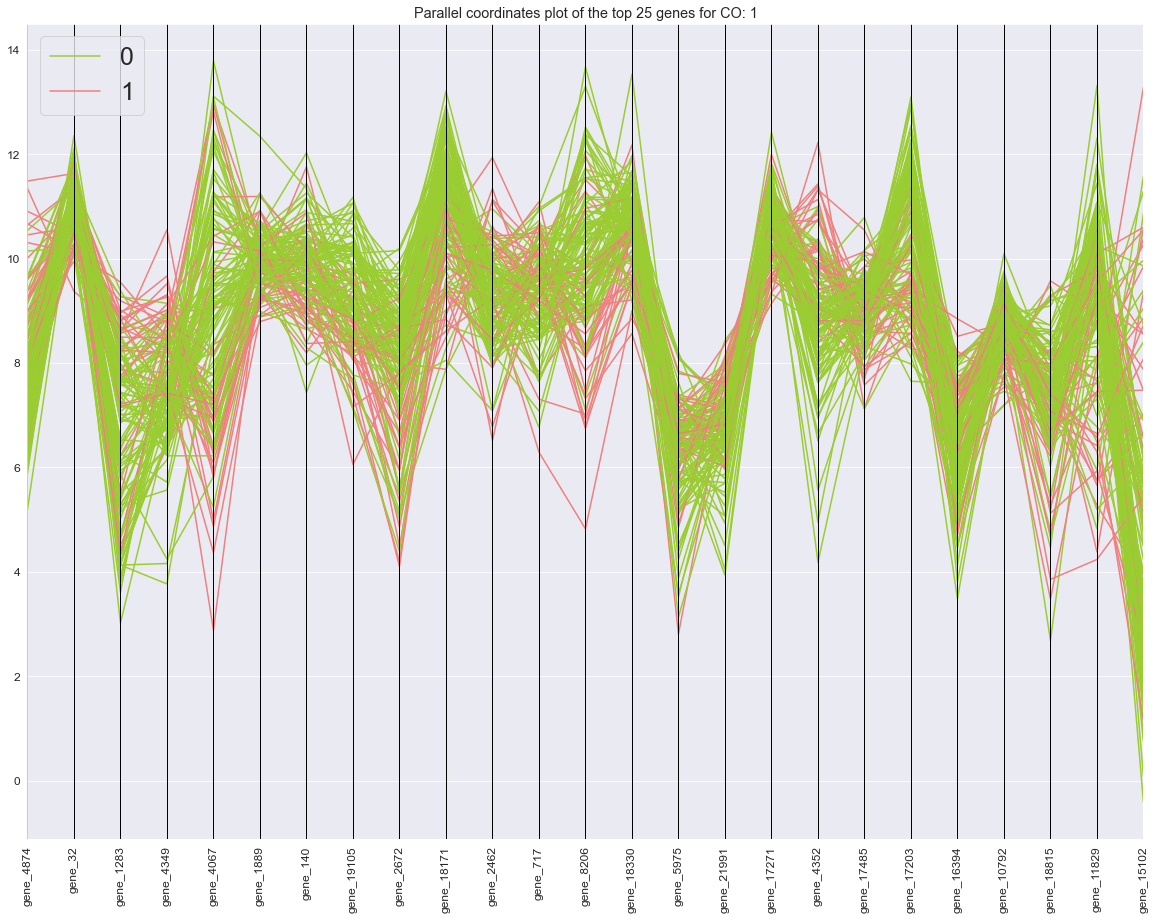

In [285]:
parallel_plt(25, 1, list1)

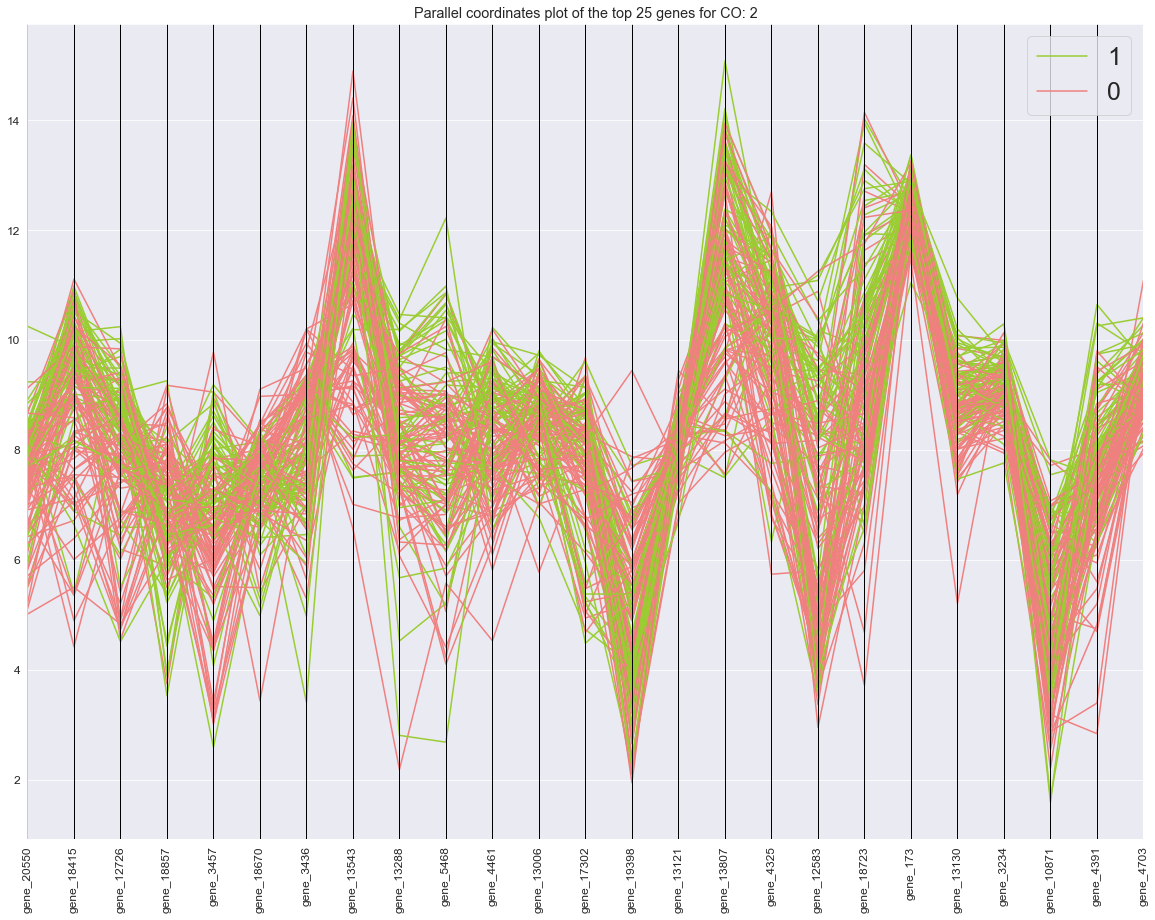

In [286]:
parallel_plt(25, 2, list2)

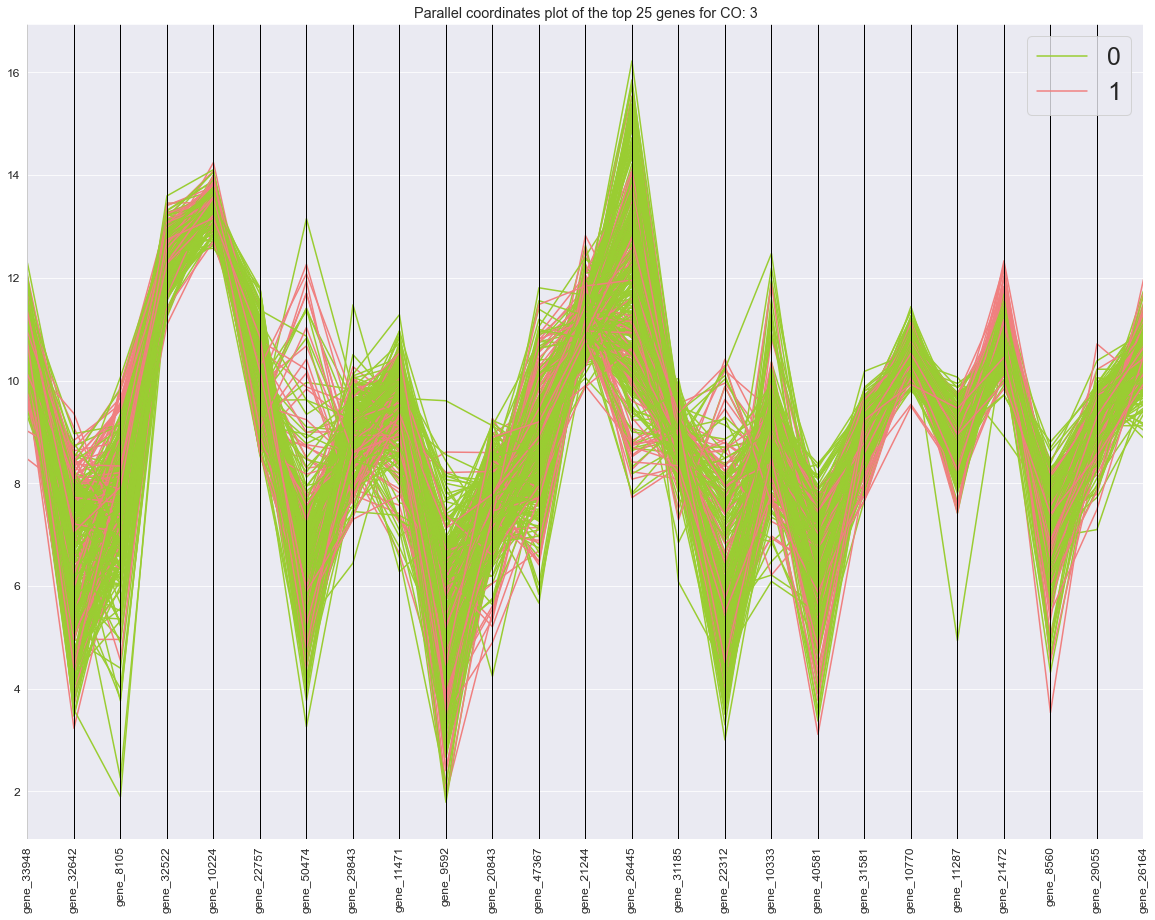

In [287]:
parallel_plt(25, 3, list3)

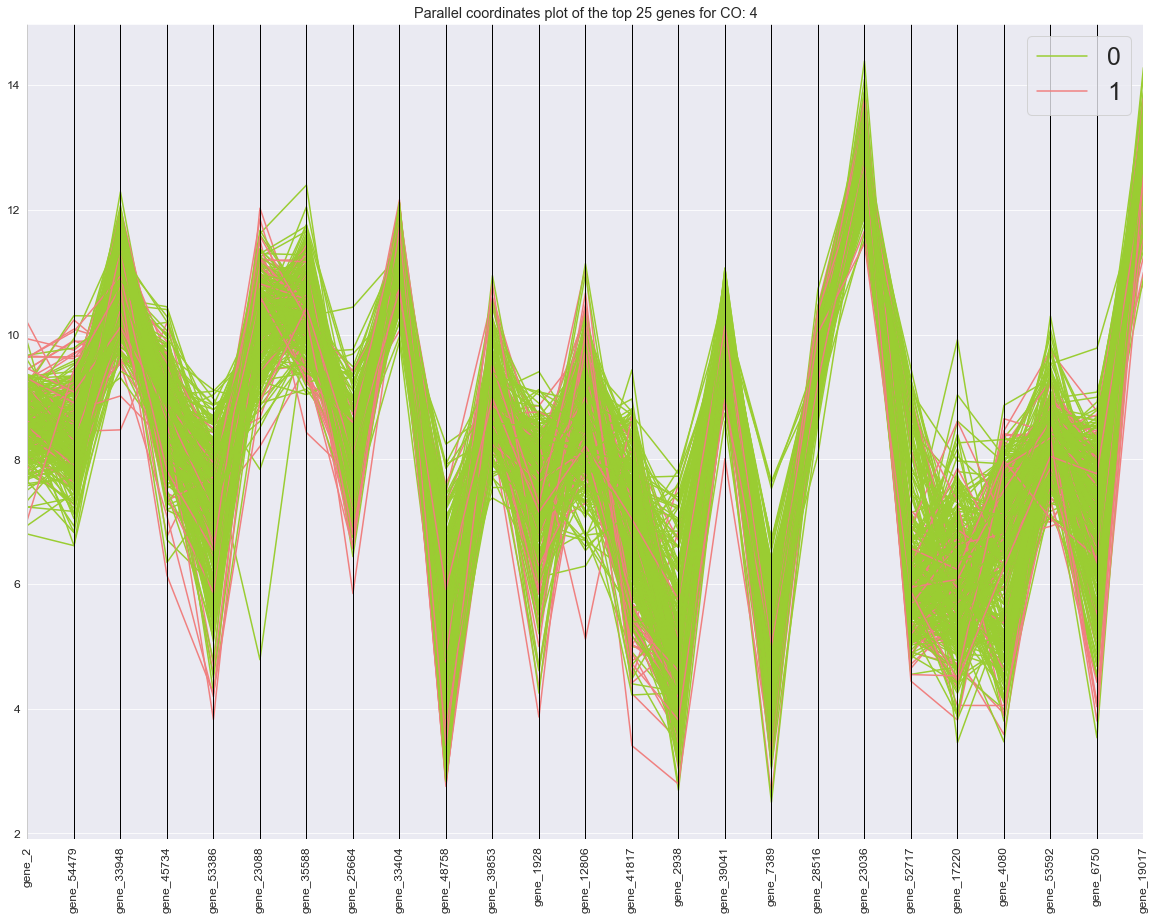

In [288]:
parallel_plt(25, 4, list4)

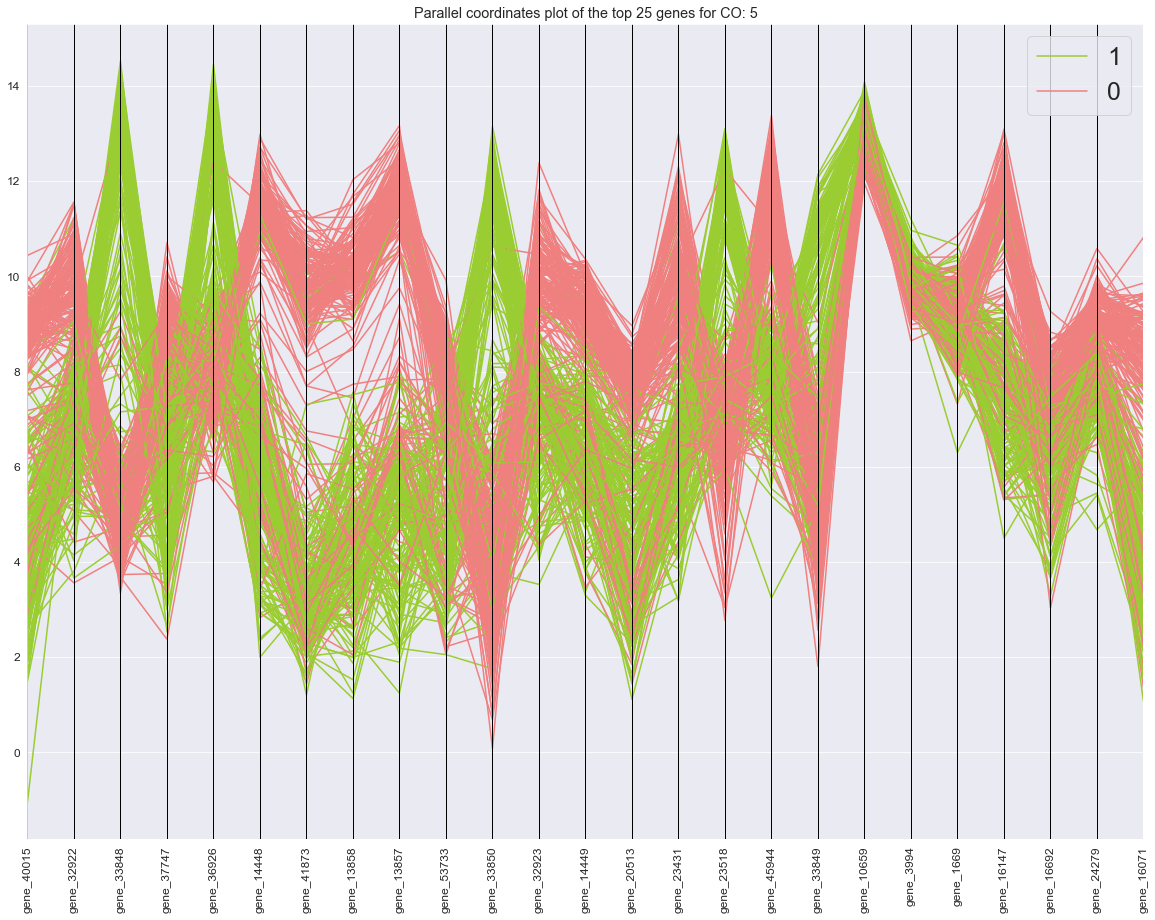

In [289]:
parallel_plt(25, 5, list5)

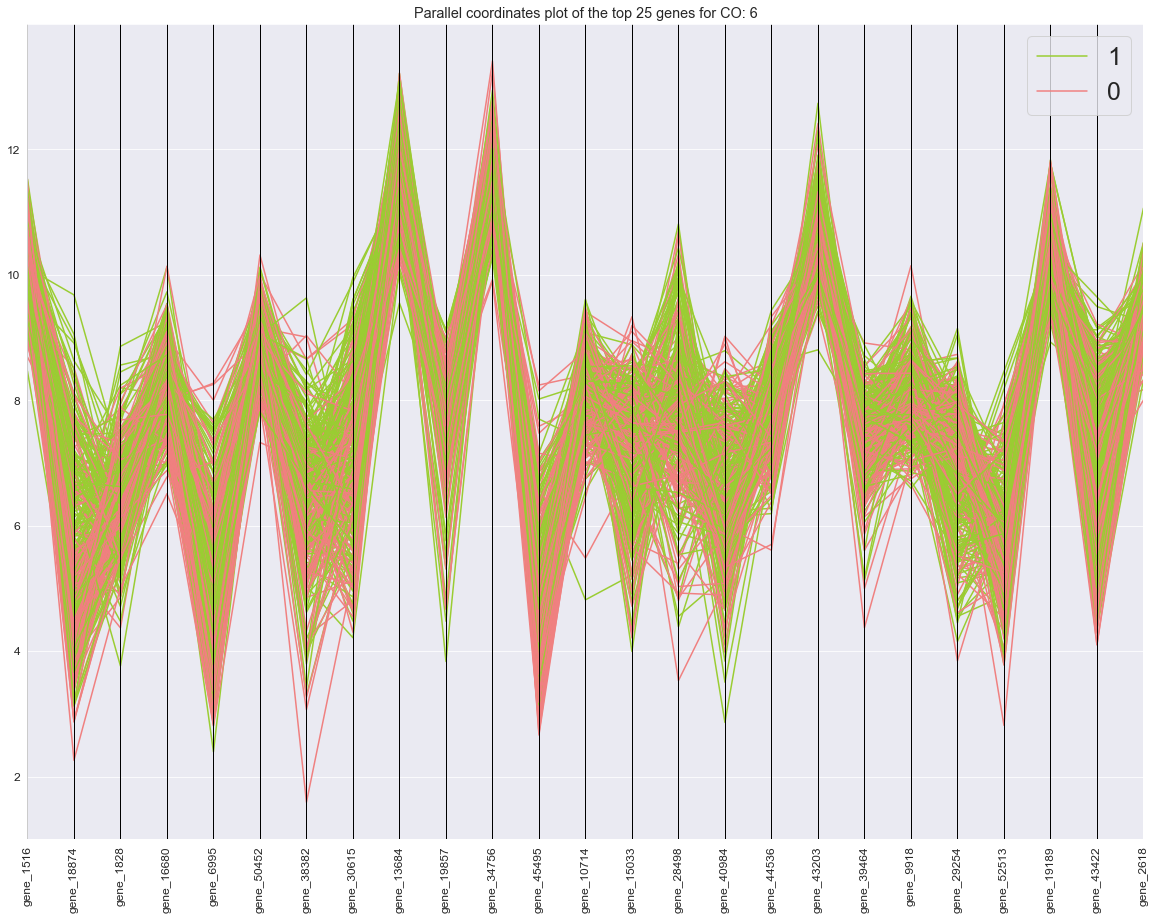

In [290]:
parallel_plt(25, 6, list6)

In [320]:
# PCA

X_list = [X, X2]

def pca_visualise(conum):
    X = X_list[conum - 1]
    x_train_N = (X - X.mean()) / (X.max() - X.min())
    
    pca = PCA()
    pca.fit(x_train_N)
    plt.clf()
    plt.figure(figsize = (8, 8))
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    #plt.axis('tight')
    plt.title('Plot of explained variance ratio vs \n index of component for dataset ' + str(conum))
    plt.xlabel('index of principal component')
    plt.ylabel('Explained variance ratio')

<Figure size 432x288 with 0 Axes>

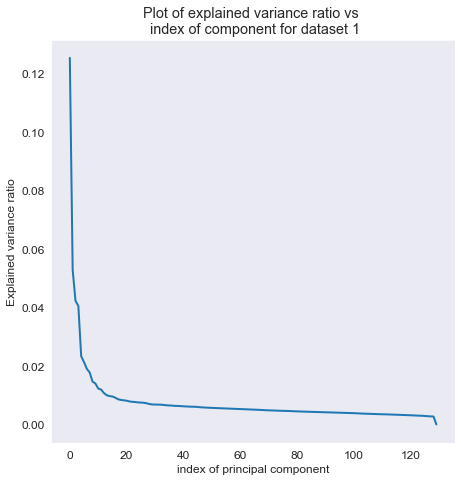

In [321]:
pca_visualise(1)

<Figure size 432x288 with 0 Axes>

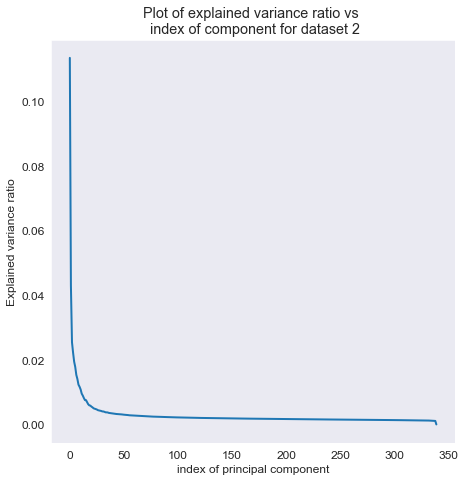

In [322]:
pca_visualise(2)